In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#import data
spam_df=pd.read_csv("spam.csv")

In [3]:
#inspect data
spam_df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
spam_df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [5]:
spam_df['spam']=spam_df['Category'].apply(lambda x:1 if x=='spam' else 0)

In [6]:
spam_df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


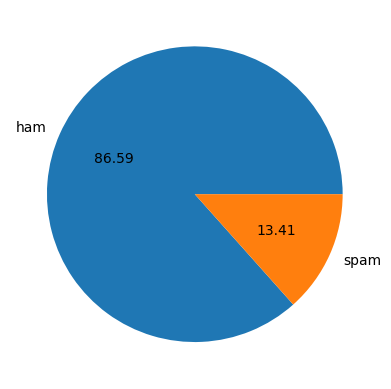

In [7]:
import matplotlib.pyplot as plt
plt.pie(spam_df['spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [8]:
#creat train/test split
x_train,x_test,y_train,y_test = train_test_split(spam_df.Message,spam_df.spam)

In [9]:
x_train.describe()

count                       4179
unique                      3934
top       Sorry, I'll call later
freq                          22
Name: Message, dtype: object

In [10]:
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(x_train)
X_test_vect = vectorizer.transform(x_test)

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vect, y_train)

LogisticRegression(max_iter=1000)

In [12]:
message = "hi anish"
message_vect = vectorizer.transform([message])
prediction = model.predict(message_vect)
if prediction[0] == 1:
    print("SPAM")
else:
    print("HAM")

HAM


In [13]:
score = model.score(X_test_vect, y_test)

print("Model Accuracy:", score)

Model Accuracy: 0.9806173725771715


In [16]:
x_test_count = vectorizer.transform(x_test)
y_pred = model.predict(x_test_count)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9806173725771715
Precision: 0.9810126582278481
Recall: 0.8659217877094972
F1-score: 0.9198813056379822
